## Uniform Sampling

* With disparity sampling (use_disp=True):
    * More points are concentrated near the near plane
    * Better precision for objects closer to the camera.


* With non-disparity sampling (use_disp=False):
    * More points are evenly distributed between near and far.

In [1]:
import torch
import matplotlib.pyplot as plt

def sample_uniform(near, far, N_samples, use_disp=True, perturb=1.0):
    """
    Uniformly sampling along the near and far plane
    """
    num_rays = len(near)
    u = torch.linspace(0, 1, N_samples)
    u = u.unsqueeze(0).tile(num_rays, 1) # num_rays x N_samples
    
    # Whether disparity spatial sampling, 
    if use_disp:
        z = 1 / ((1 / near) * (1 - u) + (1 / far) * u)
    else:
        z = near * (1 - u) + far * u

    z_mid = (z[:, :-1] + z[:, 1:]) / 2
    z_lower = torch.hstack([z[:, :1], z_mid])
    z_upper = torch.hstack([z_mid, z[:,-1:]])
    z = perturb * torch.rand_like(z) * (z_upper - z_lower) + z_lower
    return z

In [2]:
num_rays = 1
near = [1.0]
far = [10.0]
near = torch.tensor(near).tile(num_rays, 1)
far = torch.tensor(far).tile(num_rays, 1)
perturb = 1
use_disp = True
N_samples = 30

In [3]:
# Use disparity sampling
z_disp = sample_uniform(near, far, N_samples, use_disp=True, perturb=1.0)
print('Dispairty Z:\n', z_disp.shape)

Dispairty Z:
 torch.Size([1, 30])


In [4]:
# Use non-disparity sampling
z_non_disp = sample_uniform(near, far, N_samples, use_disp=False, perturb=1.0)
print('Non-Dispairty Z:\n', z_non_disp.shape)

Non-Dispairty Z:
 torch.Size([1, 30])


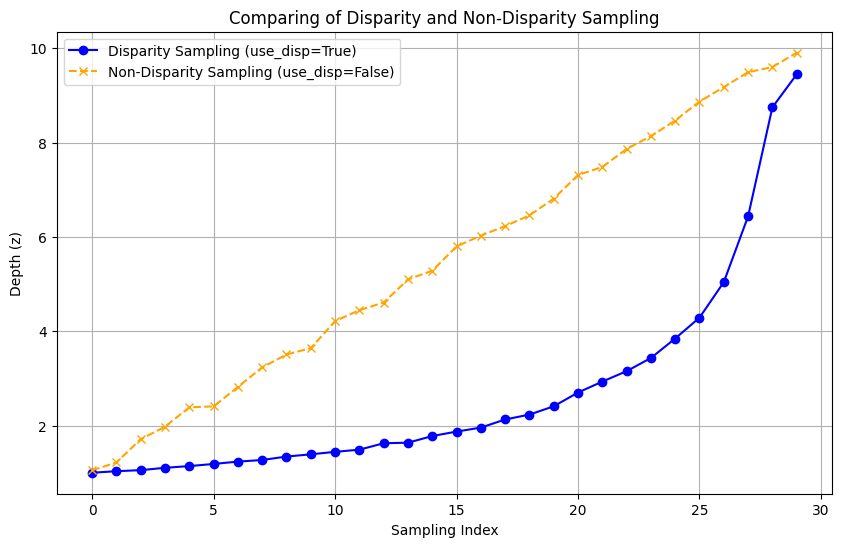

In [5]:
plt.figure(figsize=(10,6))

# Plot disparity sampling
plt.plot(z_disp[0].numpy(), label='Disparity Sampling (use_disp=True)', marker='o', linestyle='-', color='blue')

# Plot non-disparity sampling
plt.plot(z_non_disp[0].numpy(), label='Non-Disparity Sampling (use_disp=False)', marker='x', linestyle='--', color='orange')

plt.xlabel('Sampling Index')
plt.ylabel('Depth (z)')
plt.title('Comparing of Disparity and Non-Disparity Sampling')
plt.legend()
plt.grid(True)
plt.show()

### Analysis
* With disparity sampling: points are more concentrated near the near plane due to the inverse relationship.
* With non-disparity sampling): points are uniformly distributed between near and far.
* The disparity sampling line will be steeper near the near plane, while the non-disparity sampling line will be near a straight line.